# Explorations in Generative Art
## Setup
### Extensions and Imports

In [1]:
:extension NoMonomorphismRestriction FlexibleContexts TypeFamilies TemplateHaskell
-- use FlexibleInstances & TypeSynonymInstances for making type instances
import Control.Monad
import qualified Control.Monad.State as State
import Control.Monad.Trans.Class (lift)
import Control.Monad.Trans.RWS.Lazy

import System.Random
import Data.Random
import Data.RVar

import Diagrams.Prelude hiding (normal)
import Diagrams.Backend.Cairo -- for Cairo type constructor
import Data.Colour.Palette.BrewerSet
import qualified Diagrams.Color.XKCD as XKCD
import Data.Colour (withOpacity)

import Data.Tuple
import Data.Tree
import Data.Default

import Control.Lens hiding ((#))

## Art

### Main Types, Classes, and Helper Functions

In [2]:
newtype Laws = Laws { _circleTemp :: Double } -- constant factors / laws of nature
makeLenses ''Laws

instance Default Laws where
  def = Laws { _circleTemp = 0 }

data Env = Env { _step :: Int
               , _circleRad :: Double} -- variable factors / environment
makeLenses ''Env

instance Default Env where
  def = Env { _step = 0
            , _circleRad = 0}

type Drawing = QDiagram Cairo V2 Double Any -- a monoid

type Artist = RWST Laws Drawing Env RVar

class Inspiration a where
  inspire :: a -> Artist a

class Drawable a where
  draw :: a -> Drawing

In [3]:
sampleArtist seed laws env artist = State.evalState (sampleRVar randomDrawing) $ mkStdGen 1
  where randomDrawing = snd <$> execRWST artist laws env -- execRWST returns RVar (state, writer)

### Artists

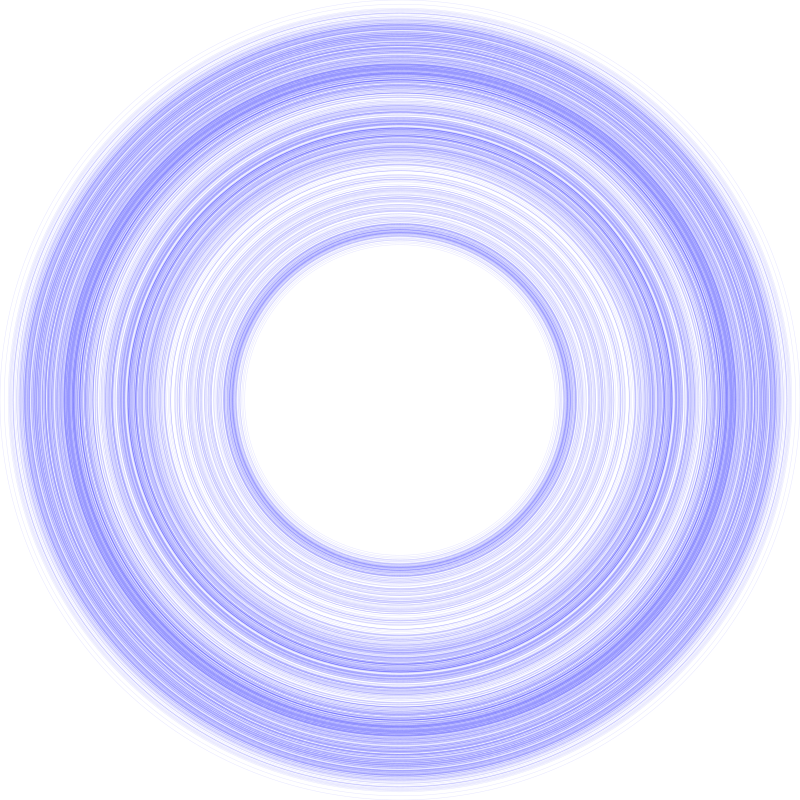

In [20]:
circleArtist :: Artist ()
circleArtist = do
  temp <- asks _circleTemp
  delta <- lift $ normal 0 temp
  modify $ over circleRad (+ delta) -- replace with lens
  rad <- gets _circleRad
  tell $ circle rad # lw 0.5 # lcA (blue `withOpacity` 0.1)
  
let laws = def & circleTemp .~ 0.02 :: Laws
    env  = def & circleRad .~ 1 :: Env
    
withImgHeight 800 $ sampleArtist 1 laws env $ replicateM 1000 circleArtist